# Imports

In [1]:
import numpy as np
import pandas as pd
from random import shuffle, seed
from tqdm import tqdm
import pickle
from PIL import Image, ImageOps
import matplotlib.pyplot as plt

In [2]:
def pickling(obj, fname):
    # Function to pickle an object to a file
    f = open(fname, 'wb')
    f.write(pickle.dumps(obj))
    f.close()

In [3]:
def unpickling(fname):
    # Function to unpicle an object from fname
    f = open(fname, 'rb')
    x = pickle.load(f)
    return x

In [4]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


# Preprocessing

In [5]:
# data = pd.read_csv('./drive/My Drive/ML Project/cleaned_data.csv', na_values='.')
# X = []
# Y = []
# for i in tqdm(range(len(data['isbn']))):
#   Y.append(data['rating'][i])
#   X.append(np.array(Image.open("/content/drive/My Drive/ML Project/imagesSmall/" + data['isbn'][i])))

In [6]:
# pickling(X, "./drive/My Drive/ML Project/ImagesX.pkl")
# pickling(Y, "./drive/My Drive/ML Project/ImagesY.pkl")

In [7]:
# temp = unpickling("./drive/My Drive/ML Project/ImagesX.pkl")
# len(temp)

In [8]:
# im = Image.fromarray(temp[0], 'RGB')
# im.save('check.png')

In [9]:
# preprocessed = []
# for i in tqdm(range(len(temp))):
#   temp2 = np.ndarray((102, 50, 3))
#   # print(temp[i].shape)
#   im = Image.fromarray(temp[i]).convert('RGB')
#   temp1 = np.array(im)
#   temp2[:temp1.shape[0], :temp1.shape[1], :temp1.shape[2]] = temp1
#   preprocessed.append(temp2)
# # preprocessed = np.array(preprocessed)
# # np.shape(preprocessed)
# # np.shape(preprocessed[0])

In [10]:
# def add_margin(pil_img, top, right, bottom, left, color):
#     width, height = pil_img.size
#     new_width = width + right + left
#     new_height = height + top + bottom
#     result = Image.new(pil_img.mode, (new_width, new_height), color)
#     result.paste(pil_img, (left, top))
#     return result

In [11]:
# preprocessed = []
# for i in tqdm(range(len(temp))):
#   im = Image.fromarray(temp[i]).convert('RGB')
#   temp1 = np.array(im)
#   newImg = add_margin(im, 0, 0, 102 - temp1.shape[0], 0, (0, 0, 0))
#   preprocessed.append(np.array(newImg))

In [12]:
# print(len(preprocessed))
# print(np.shape(preprocessed[5000]))

In [13]:
# pickling(preprocessed, "./drive/My Drive/ML Project/ImagesPreprocessedX2.pkl")

In [14]:
X_pickle = unpickling("./drive/My Drive/ML Project/data/ImagesPreprocessedX2.pkl") # List of Numpy Arrays (102 X 50 X 3)
Y_pickle = unpickling("./drive/My Drive/ML Project/data/ImagesY.pkl")


In [15]:
new_X = []
new_Y = []
for i in range(len(X_pickle)):
    x = X_pickle[i]
    if x.shape == (102, 50, 3):
        new_X.append(x/255)
        new_Y.append(Y_pickle[i])
# new_X /= 255
# new_Y /= 255

In [16]:
def remove_samples(X_train, y_train):
    remove = 10000
    added = []
    for i in range(X_train.shape[0]):
        if y_train[i] > 3.8 and y_train[i] < 4.2 and remove:
            remove -= 1
        else:
            added.append(i)

    X_train_new = np.ndarray((len(added), X_train.shape[1]))
    y_train_new = np.ndarray((len(added)))

    for i in range(len(added)):
        X_train_new[i] = X_train[added[i]]
        y_train_new[i] = y_train[added[i]]

    return X_train_new, y_train_new

# Models

## CNN

In [ ]:
from keras import layers
from keras.layers import Input, Dense, Activation, ZeroPadding2D, BatchNormalization, Flatten, Conv2D
from keras.layers import AveragePooling2D, MaxPooling2D, Dropout, GlobalMaxPooling2D, GlobalAveragePooling2D
from keras.models import Model
from sklearn.model_selection import train_test_split

In [ ]:
def model(input_shape):
    X_input = Input(input_shape)
    
    X = Conv2D(6, (2, 2), name = 'conv0')(X_input)
    X = BatchNormalization(axis = 3, name = 'bn0')(X)
    X = Activation('elu')(X)
    
    X = MaxPooling2D((2, 2), name='max_pool')(X)
    
    X = Flatten()(X)
    X = Dense(1, name='fc')(X)

    model = Model(inputs = X_input, outputs = X, name='HappyModel')

    return model

X = np.ndarray((len(new_X), 102, 50, 3))
for i in range(len(new_X)):
    X[i] = new_X[i]
Y = np.array(new_Y).reshape((len(new_Y), 1))
X_train, X_test, y_train, y_test = train_test_split(X, Y, random_state=0)
nn = model(X[0].shape)
nn.compile(optimizer = "adam", loss = "mse", metrics = ["mse"])
nn.fit(x = X_train, y = y_train, epochs = 20, batch_size = 32)
nn.evaluate(x = X_test, y = y_test)

Epoch 1/20
476/476 [==============================] - 41s 87ms/step - loss: 0.4918 - mse: 0.4918
Epoch 2/20
476/476 [==============================] - 41s 87ms/step - loss: 0.2912 - mse: 0.2912
Epoch 3/20
476/476 [==============================] - 41s 86ms/step - loss: 0.2794 - mse: 0.2794
Epoch 4/20
476/476 [==============================] - 42s 88ms/step - loss: 0.2154 - mse: 0.2154
Epoch 5/20
476/476 [==============================] - 42s 87ms/step - loss: 0.1944 - mse: 0.1944
Epoch 6/20
476/476 [==============================] - 41s 86ms/step - loss: 0.1811 - mse: 0.1811
Epoch 7/20
476/476 [==============================] - 41s 87ms/step - loss: 0.1792 - mse: 0.1792
Epoch 8/20
476/476 [==============================] - 42s 87ms/step - loss: 0.1659 - mse: 0.1659
Epoch 9/20
476/476 [==============================] - 41s 87ms/step - loss: 0.1810 - mse: 0.1810
Epoch 10/20
476/476 [==============================] - 41s 87ms/step - loss: 0.1466 - mse: 0.1466
Epoch 11/20
476/476 [========

[0.2500438392162323, 0.2500438392162323]

<Figure size 432x288 with 0 Axes>

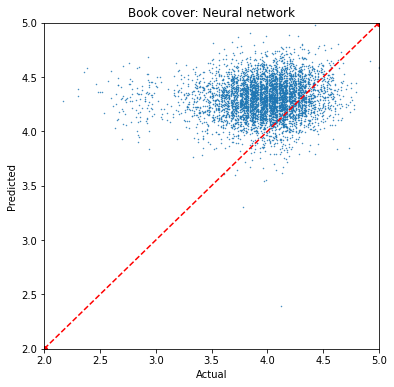

In [ ]:
plt.clf()
fig, ((ax1)) = plt.subplots(1, 1)
y_hat_test = nn.predict(X_test)
ax1.set_title('Book cover: Neural network')
ax1.scatter(y_test, y_hat_test, s = 0.2)
ax1.plot((2, 5), (2, 5), 'ro--')
ax1.set_xlabel('Actual')
ax1.set_ylabel('Predicted')
ax1.set_xlim(2, 5)
ax1.set_ylim(2, 5)
fig.set_size_inches(6, 6)

In [ ]:
fig.set_size_inches(6, 6)

## ANN

In [17]:
import tensorflow as tf
from tensorflow import keras
from keras import layers
from keras.layers import Input, Dense
from keras.models import Model
from sklearn.model_selection import train_test_split

def model(input_shape):
    X_input = Input(input_shape)
    X = Dense(512, activation='elu')(X_input)
    X = Dense(256, activation='elu')(X)
    X = Dense(128, activation='elu')(X)
    X = Dense(64, activation='elu')(X)
    X = Dense(32, activation='elu')(X)
    X = Dense(16, activation= 'elu')(X)
    X = Dense(8, activation= 'elu')(X)
    X = Dense(1)(X)
    model = Model(inputs = X_input, outputs = X, name='HappyModel')
    
    return model

X = np.ndarray((len(new_X), 102, 50, 3))

for i in range(len(new_X)):
    X[i] = new_X[i]
Y = np.array(new_Y).reshape((len(new_Y), 1))

X = np.asarray(X).astype('float64').reshape((X.shape[0], X.shape[1] * X.shape[2] * X.shape[3]))
Y = np.asarray(Y).astype('float64')

X_train, X_test, y_train, y_test = train_test_split(X, Y, random_state=5, shuffle = True)

X_train, y_train = remove_samples(X_train, y_train)
happyModel = model(X[0].shape)
happyModel.compile(optimizer='adam', loss = "mse", metrics = ["mse"])
happyModel.fit(x = X_train, y = y_train, epochs = 20, batch_size=50)
# happyMnt(X.shape)
# print(Y.shaodel.fit(x = X_train, y = y_train, epochs = 5))

loss, acc = happyModel.evaluate(x = X_test, y = y_test)

Epoch 1/20
148/148 [==============================] - 8s 47ms/step - loss: 2.1426 - mse: 2.1426
Epoch 2/20
148/148 [==============================] - 7s 48ms/step - loss: 0.4222 - mse: 0.4222
Epoch 3/20
148/148 [==============================] - 7s 48ms/step - loss: 0.3254 - mse: 0.3254
Epoch 4/20
148/148 [==============================] - 7s 47ms/step - loss: 0.2275 - mse: 0.2275
Epoch 5/20
148/148 [==============================] - 7s 48ms/step - loss: 0.2405 - mse: 0.2405
Epoch 6/20
148/148 [==============================] - 7s 47ms/step - loss: 0.2229 - mse: 0.2229
Epoch 7/20
148/148 [==============================] - 7s 48ms/step - loss: 0.2233 - mse: 0.2233
Epoch 8/20
148/148 [==============================] - 7s 49ms/step - loss: 0.2322 - mse: 0.2322
Epoch 9/20
148/148 [==============================] - 7s 49ms/step - loss: 0.2267 - mse: 0.2267
Epoch 10/20
148/148 [==============================] - 7s 48ms/step - loss: 0.2454 - mse: 0.2454
Epoch 11/20
148/148 [==================

In [ ]:
from sklearn.model_selection import train_test_split
def mean_squared_error(y, y_hat):
    return sum((y_hat - y)**2 * (abs(3.97 - y) + 1))/y.shape[0]

X = np.ndarray((len(new_X), 102, 50, 3))

for i in range(len(new_X)):
    X[i] = new_X[i]
Y = np.array(new_Y).reshape((len(new_Y), 1))

X = np.asarray(X).astype('float64').reshape((X.shape[0], X.shape[1] * X.shape[2] * X.shape[3]))
Y = np.asarray(Y).astype('float64')

X_train, X_test, y_train, y_test = train_test_split(X, Y, random_state=0)

    
y_pred = [3.97] * len(y_train)
y_pred = np.array(y_pred).reshape((len(y_train), 1))
print(mean_squared_error(y_train, y_pred))


[0.2018129]


# Changing Hidden Units

In [17]:
units = [8, 16, 32, 64, 128, 256, 512]
lossTrain = []
lossVal = []

In [18]:
lossTrain =  [0.12939968705177307, 0.11379894614219666, 0.11506103724241257, 0.11508119851350784, 0.11532635986804962, 0.11529882252216339]
lossVal =  [0.16136738657951355, 0.12281204760074615, 0.11540650576353073, 0.11541052907705307, 0.11577586084604263, 0.1158200204372406]

In [19]:
import tensorflow as tf
from tensorflow import keras
from keras import layers
from keras.layers import Input, Dense
from keras.models import Model
from sklearn.model_selection import train_test_split

def model(input_shape, hidden_unit):
    X_input = Input(input_shape)
    X = Dense(hidden_unit, activation='elu')(X_input)
    X = Dense(1)(X)
    model = Model(inputs = X_input, outputs = X, name='HappyModel')
    
    return model

hidd = 512
print(hidd)
X = np.ndarray((len(new_X), 102, 50, 3))

for i in range(len(new_X)):
    X[i] = new_X[i]
Y = np.array(new_Y).reshape((len(new_Y), 1))

X = np.asarray(X).astype('float64').reshape((X.shape[0], X.shape[1] * X.shape[2] * X.shape[3]))
Y = np.asarray(Y).astype('float64')

# kfold = KFold(n_splits=5)
# train_avg = 0
# test_avg = 0
# custom_avg = 0
# for train_index, test_index in kfold.split(X):
#     X_train, X_test = X[train_index], X[test_index]
#     y_train, y_test = Y[train_index], Y[test_index]
#     xgb_r = RandomForestRegressor(max_depth=5, random_state=0)
#     xgb_r.fit(X_train, y_train)
#     y_hat = xgb_r.predict(X_train)
#     train_avg += mean_squared_error(y_hat, y_train)
#     y_hat = xgb_r.predict(X_test)
#     test_avg += mean_squared_error(y_hat, y_test)
#     custom_avg += custom_mean_squared_error(y_hat, y_test)

X_train, X_test, y_train, y_test = train_test_split(X, Y, random_state=5, shuffle = True)

# X_train, y_train = remove_samples(X_train, y_train)
happyModel = model(X[0].shape, hidd)
happyModel.compile(optimizer='adam', loss = "mse", metrics = ["mse"])
happyModel.fit(x = X_train, y = y_train, epochs = 10, batch_size=50)
loss, acc = happyModel.evaluate(x = X_train, y = y_train)
lossTrain.append(loss)
loss, acc = happyModel.evaluate(x = X_test, y = y_test)
lossVal.append(loss)

512
Epoch 1/10
305/305 [==============================] - 14s 43ms/step - loss: 159.6913 - mse: 159.6913
Epoch 2/10
305/305 [==============================] - 13s 43ms/step - loss: 0.1192 - mse: 0.1192
Epoch 3/10
305/305 [==============================] - 13s 43ms/step - loss: 0.1151 - mse: 0.1151
Epoch 4/10
305/305 [==============================] - 13s 43ms/step - loss: 0.1170 - mse: 0.1170
Epoch 5/10
305/305 [==============================] - 13s 43ms/step - loss: 0.1159 - mse: 0.1159
Epoch 6/10
305/305 [==============================] - 13s 44ms/step - loss: 0.1145 - mse: 0.1145
Epoch 7/10
305/305 [==============================] - 13s 43ms/step - loss: 0.1183 - mse: 0.1183
Epoch 8/10
305/305 [==============================] - 13s 44ms/step - loss: 0.1145 - mse: 0.1145
Epoch 9/10
305/305 [==============================] - 13s 44ms/step - loss: 0.1079 - mse: 0.1079
Epoch 10/10
159/159 [==============================] - 2s 12ms/step - loss: 0.1188 - mse: 0.1188


In [20]:
print("lossTrain = ", lossTrain)
print("lossVal = ", lossVal)

lossTrain =  [0.12939968705177307, 0.11379894614219666, 0.11506103724241257, 0.11508119851350784, 0.11532635986804962, 0.11529882252216339, 0.11790211498737335]
lossVal =  [0.16136738657951355, 0.12281204760074615, 0.11540650576353073, 0.11541052907705307, 0.11577586084604263, 0.1158200204372406, 0.11877105385065079]


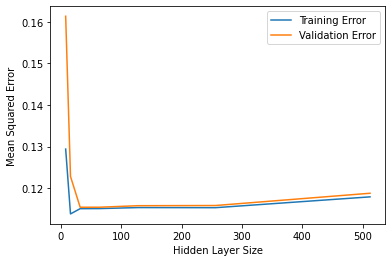

In [23]:
import matplotlib.pyplot as plt
plt.plot(units, lossTrain)
plt.plot(units, lossVal)
plt.legend(["Training Error", "Validation Error"])
plt.xlabel("Hidden Layer Size")
plt.ylabel("Mean Squared Error")
plt.show()

## Alexnet

In [ ]:
import torch
import numpy as np
import pickle
from PIL import Image
from torchvision import transforms
from torch.utils.data import Dataset, DataLoader
import pandas as pd

import torch
import torch.nn as nn
import torch.nn.functional as F
import numpy as np
import pandas as pd
from torchvision import transforms
import random
import torch.optim as optim
import matplotlib.pyplot as plt
from sklearn import metrics

model = torch.hub.load('pytorch/vision:v0.6.0', 'alexnet', pretrained=True)
model.eval()

Downloading: "https://github.com/pytorch/vision/archive/v0.6.0.zip" to /root/.cache/torch/hub/v0.6.0.zip
Downloading: "https://download.pytorch.org/models/alexnet-owt-4df8aa71.pth" to /root/.cache/torch/hub/checkpoints/alexnet-owt-4df8aa71.pth


AlexNet(
  (features): Sequential(
    (0): Conv2d(3, 64, kernel_size=(11, 11), stride=(4, 4), padding=(2, 2))
    (1): ReLU(inplace=True)
    (2): MaxPool2d(kernel_size=3, stride=2, padding=0, dilation=1, ceil_mode=False)
    (3): Conv2d(64, 192, kernel_size=(5, 5), stride=(1, 1), padding=(2, 2))
    (4): ReLU(inplace=True)
    (5): MaxPool2d(kernel_size=3, stride=2, padding=0, dilation=1, ceil_mode=False)
    (6): Conv2d(192, 384, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (7): ReLU(inplace=True)
    (8): Conv2d(384, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (9): ReLU(inplace=True)
    (10): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (11): ReLU(inplace=True)
    (12): MaxPool2d(kernel_size=3, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (avgpool): AdaptiveAvgPool2d(output_size=(6, 6))
  (classifier): Sequential(
    (0): Dropout(p=0.5, inplace=False)
    (1): Linear(in_features=9216, out_features=4096, bias=True)
 